In [29]:
# data taken from http://www.sidc.be/silso/infossntotdaily

import pandas as pd
import numpy as np

df = pd.read_csv("SN_d_tot_V2.0.csv")

df.head()


,1818;01;01;1818.001; -1; -1.0; 0;1
0,1818;01;02;1818.004; -1; -1.0; 0;1
1,1818;01;03;1818.007; -1; -1.0; 0;1
2,1818;01;04;1818.010; -1; -1.0; 0;1
3,1818;01;05;1818.012; -1; -1.0; 0;1
4,1818;01;06;1818.015; -1; -1.0; 0;1


In [30]:
df.columns

Index(['1818;01;01;1818.001;  -1; -1.0;   0;1'], dtype='object')

In [31]:
#here columns 1 to 3 represent Gregorian Year Month Date
#column 4 is date as fraction year
#column 5 and 6 are SN Value and SN Error
#column 7 is no. of Observation
#column 8 we have to check
#also the values are seperated by ";" and not ","
df = pd.read_csv("SN_d_tot_V2.0.csv", sep=";")
df.head()

,1818,01,01.1,1818.001,-1,-1.0,0,1
0,1818,1,2,1818.004,-1,-1.0,0,1
1,1818,1,3,1818.007,-1,-1.0,0,1
2,1818,1,4,1818.010,-1,-1.0,0,1
3,1818,1,5,1818.012,-1,-1.0,0,1
4,1818,1,6,1818.015,-1,-1.0,0,1


In [32]:
#first lets change the column name
cols = ["year", "month", "date", "frac_date", "sn_value", "sn_error", "num_of_obs","check"]
df = pd.read_csv("SN_d_tot_V2.0.csv", sep=";", header = None,names=cols)
df.head()

,year,month,date,frac_date,sn_value,sn_error,num_of_obs,check
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


In [33]:
df.check.value_counts()

check
1    74965
0      153
Name: count, dtype: int64

In [34]:
df[df.check == 0].head()

,year,month,date,frac_date,sn_value,sn_error,num_of_obs,check
74965,2023,4,1,2023.248,61,14.9,12,0
74966,2023,4,2,2023.251,49,10.2,23,0
74967,2023,4,3,2023.253,61,10.0,46,0
74968,2023,4,4,2023.256,64,12.1,45,0
74969,2023,4,5,2023.259,52,11.0,41,0


In [35]:
#after seeing we still dont know what check is. First lets fix other things
#sn value -1 means missing values
#lets check whether sn_error is also -1 when sn values is 

print(df.sn_value.value_counts())
print(df.sn_error.value_counts())


sn_value
 0      11398
-1       3247
 12      1331
 23       931
 27       930
        ...  
 455        1
 457        1
 477        1
 415        1
 390        1
Name: count, Length: 438, dtype: int64
sn_error
 2.0     8756
-1.0     3247
 0.0     2785
 3.0      950
 6.3      809
         ... 
 28.2       1
 26.3       1
 28.1       1
 29.6       1
 25.0       1
Name: count, Length: 305, dtype: int64


In [36]:
len(df[np.logical_and((df.sn_value == -1),(df.sn_error == -1))])

#which is same as 3247, hence data is correct

3247

In [37]:
#now lets replace sn_value -1 with NaN
df.loc[df.index[df.sn_value == -1],["sn_value", "sn_error"]] = None

In [38]:
df.head()

,year,month,date,frac_date,sn_value,sn_error,num_of_obs,check
0,1818,1,1,1818.001,NaN,NaN,0,1
1,1818,1,2,1818.004,NaN,NaN,0,1
2,1818,1,3,1818.007,NaN,NaN,0,1
3,1818,1,4,1818.010,NaN,NaN,0,1
4,1818,1,5,1818.012,NaN,NaN,0,1


In [44]:
df[df.sn_value.notnull()]

,year,month,date,frac_date,sn_value,sn_error,num_of_obs,check
7,1818,1,8,1818.021,65.0,10.2,1,1
12,1818,1,13,1818.034,37.0,7.7,1,1
16,1818,1,17,1818.045,77.0,11.1,1,1
17,1818,1,18,1818.048,98.0,12.6,1,1
18,1818,1,19,1818.051,105.0,13.0,1,1
...,...,...,...,...,...,...,...,...
75113,2023,8,27,2023.653,84.0,10.5,31,0
75114,2023,8,28,2023.656,84.0,12.3,36,0
75115,2023,8,29,2023.659,88.0,11.8,28,0
75116,2023,8,30,2023.662,104.0,14.8,32,0


In [45]:
df.iloc[10:20,:]

,year,month,date,frac_date,sn_value,sn_error,num_of_obs,check
10,1818,1,11,1818.029,NaN,NaN,0,1
11,1818,1,12,1818.032,NaN,NaN,0,1
12,1818,1,13,1818.034,37.0,7.7,1,1
13,1818,1,14,1818.037,NaN,NaN,0,1
14,1818,1,15,1818.040,NaN,NaN,0,1
15,1818,1,16,1818.042,NaN,NaN,0,1
16,1818,1,17,1818.045,77.0,11.1,1,1
17,1818,1,18,1818.048,98.0,12.6,1,1
18,1818,1,19,1818.051,105.0,13.0,1,1
19,1818,1,20,1818.053,NaN,NaN,0,1


In [73]:
#parsing dates correctly
df.rename(columns={"date":"day"}, inplace =True)

In [78]:
df["fulldate"] = pd.to_datetime(df.iloc[:,[0,1,2]])


In [79]:
df.head()

,year,month,day,frac_date,sn_value,sn_error,num_of_obs,check,fulldate
0,1818,1,1,1818.001,NaN,NaN,0,1,1818-01-01
1,1818,1,2,1818.004,NaN,NaN,0,1,1818-01-02
2,1818,1,3,1818.007,NaN,NaN,0,1,1818-01-03
3,1818,1,4,1818.010,NaN,NaN,0,1,1818-01-04
4,1818,1,5,1818.012,NaN,NaN,0,1,1818-01-05


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75118 entries, 0 to 75117
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        75118 non-null  int64         
 1   month       75118 non-null  int64         
 2   day         75118 non-null  int64         
 3   frac_date   75118 non-null  float64       
 4   sn_value    71871 non-null  float64       
 5   sn_error    71871 non-null  float64       
 6   num_of_obs  75118 non-null  int64         
 7   check       75118 non-null  int64         
 8   fulldate    75118 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 5.2 MB


In [82]:
#lets use dates as index
df.index = df.fulldate
df.index.name = 'date'

In [83]:
df.head()

,year,month,day,frac_date,sn_value,sn_error,num_of_obs,check,fulldate
date,,,,,,,,,
1818-01-01,1818,1,1,1818.001,NaN,NaN,0,1,1818-01-01
1818-01-02,1818,1,2,1818.004,NaN,NaN,0,1,1818-01-02
1818-01-03,1818,1,3,1818.007,NaN,NaN,0,1,1818-01-03
1818-01-04,1818,1,4,1818.010,NaN,NaN,0,1,1818-01-04
1818-01-05,1818,1,5,1818.012,NaN,NaN,0,1,1818-01-05


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75118 entries, 1818-01-01 to 2023-08-31
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        75118 non-null  int64         
 1   month       75118 non-null  int64         
 2   day         75118 non-null  int64         
 3   frac_date   75118 non-null  float64       
 4   sn_value    71871 non-null  float64       
 5   sn_error    71871 non-null  float64       
 6   num_of_obs  75118 non-null  int64         
 7   check       75118 non-null  int64         
 8   fulldate    75118 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 5.7 MB


In [86]:
#removing datetime cols
df = df[["sn_value",	"sn_error",	"num_of_obs",	"check"]]
df.head()

,sn_value,sn_error,num_of_obs,check
date,,,,
1818-01-01,NaN,NaN,0,1
1818-01-02,NaN,NaN,0,1
1818-01-03,NaN,NaN,0,1
1818-01-04,NaN,NaN,0,1
1818-01-05,NaN,NaN,0,1


<Axes: xlabel='date'>

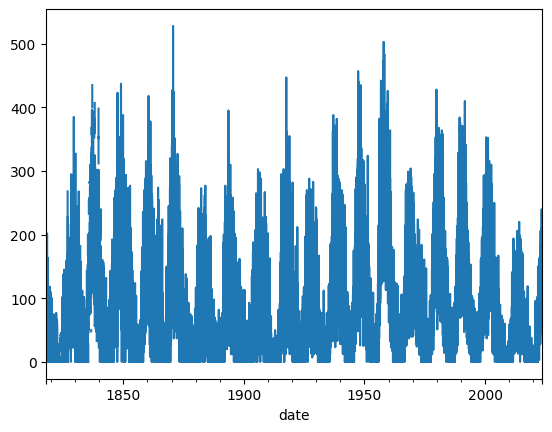

In [87]:
import matplotlib.pyplot as plt

df.sn_value.plot()